In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#SK-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Abro el dataset generado

In [3]:
df_confirmados = pd.read_feather('./data/pivot_data')
df_confirmados.head(60)

,index,argentino,asistencia_respiratoria,confirmados,cuidado_intensivo,edad,fallecidos,mayor_65,presentan_sintomas,privado,publico,internacion,sexo_F,sexo_M
0,2020-03-01,0,0,0,0,0.000000,0,0,0,0,0,0,0,0
1,2020-03-02,1,0,1,0,43.000000,0,0,1,1,0,1,0,1
2,2020-03-03,0,0,0,0,0.000000,0,0,0,0,0,0,0,0
3,2020-03-04,0,0,0,0,0.000000,0,0,0,0,0,0,0,0
4,2020-03-05,5,1,5,1,50.600000,1,2,5,3,2,3,1,4
5,2020-03-06,1,0,1,0,68.000000,0,1,1,1,0,1,0,1
6,2020-03-07,1,0,1,0,71.000000,0,1,1,0,1,0,0,1
7,2020-03-08,1,0,1,0,52.000000,0,0,1,0,1,0,0,1
8,2020-03-09,1,0,1,0,24.000000,0,0,1,0,1,0,0,1
9,2020-03-10,3,0,3,1,53.666667,1,2,3,2,1,2,0,3


In [4]:
df_confirmados.index = df_confirmados['index']
df_confirmados.drop('index', axis=1, inplace=True)

In [5]:
df_confirmados.tail()

,argentino,asistencia_respiratoria,confirmados,cuidado_intensivo,edad,fallecidos,mayor_65,presentan_sintomas,privado,publico,internacion,sexo_F,sexo_M
index,,,,,,,,,,,,,
2020-09-26,678,7,694,9,44.386167,12,123,359,394,300,54,348,346
2020-09-27,556,2,567,6,40.890212,7,76,335,307,260,45,274,293
2020-09-28,764,3,785,6,41.391614,9,113,431,480,305,53,399,386
2020-09-29,892,4,906,4,42.691685,9,137,454,531,375,57,449,457
2020-09-30,830,3,853,9,42.136186,12,134,452,513,340,59,426,427


In [6]:
df_confirmados.head(63)

,argentino,asistencia_respiratoria,confirmados,cuidado_intensivo,edad,fallecidos,mayor_65,presentan_sintomas,privado,publico,internacion,sexo_F,sexo_M
index,,,,,,,,,,,,,
2020-03-01,0,0,0,0,0.000000,0,0,0,0,0,0,0,0
2020-03-02,1,0,1,0,43.000000,0,0,1,1,0,1,0,1
2020-03-03,0,0,0,0,0.000000,0,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0.000000,0,0,0,0,0,0,0,0
2020-03-05,5,1,5,1,50.600000,1,2,5,3,2,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-28,43,0,43,0,42.488372,3,10,34,30,13,13,20,23
2020-04-29,51,1,53,1,43.037736,2,11,41,26,27,21,33,20
2020-04-30,44,0,45,1,49.777778,4,10,35,25,20,25,23,22


### Probamos distintos modelos de regresion


#### Divido el dataset en train-test (sin usar split, para mantener la temporalidad)

In [59]:
#selecciono las variables a utilizar
#selecciono el primer 70% de los datos para entrenar el modelo

# x_train =  np.array(df_confirmados[["asistencia_respiratoria","confirmados","cuidado_intensivo","presentan_sintomas","internacion"]].iloc[0:150,:])
# #x_train =  np.array(df_confirmados[["cuidado_intensivo","asistencia_respiratoria","presentan_sintomas","internacion"]].iloc[0:150,:])
# y_train =  np.array(df_confirmados[["fallecidos"]].iloc[0:150]) 

# #me quedo con el 30% restante para testear
# x_test = np.array(df_confirmados[["asistencia_respiratoria","confirmados","cuidado_intensivo","presentan_sintomas","internacion"]].iloc[150:215,:])
# #x_test = np.array(df_confirmados[["asistencia_respiratoria","cuidado_intensivo","presentan_sintomas","internacion"]].iloc[150:215,:])
# y_test = np.array(df_confirmados[["fallecidos"]].iloc[150:2215,:]) 



# #PRUEBO OTRA PARTICION
# #selecciono el primer 70% de los datos para entrenar el modelo
# df_confirmados= df_confirmados.loc[df_confirmados.index >= pd.Timestamp(year=2020, month=5, day=1), :] #desde mayo
# df_confirmados

#entreno con el 70% de datos desde mayo y testeo con el 30% restante (desde mediados de agosto hasta fin de sept)
# x_train =  np.array(df_confirmados[["asistencia_respiratoria","confirmados","cuidado_intensivo","mayor_65","presentan_sintomas","internacion"]].iloc[0:108,:])
x_train =  np.array(df_confirmados[["asistencia_respiratoria","confirmados","cuidado_intensivo","mayor_65","internacion"]].iloc[0:108,:])
y_train =  np.array(df_confirmados[["fallecidos"]].iloc[0:108]) 

# x_test =  np.array(df_confirmados[["asistencia_respiratoria","confirmados","cuidado_intensivo","mayor_65","presentan_sintomas","internacion"]].iloc[108:154,:])
x_test =  np.array(df_confirmados[["asistencia_respiratoria","confirmados","cuidado_intensivo","mayor_65","internacion"]].iloc[108:154,:])
y_test =  np.array(df_confirmados[["fallecidos"]].iloc[108:154])


# #PRUEBO OTRA PARTICION
# #selecciono el primer 80% de los datos para entrenar el modelo  
# df_confirmados= df_confirmados.loc[df_confirmados.index >= pd.Timestamp(year=2020, month=5, day=1), :] #desde mayo
# df_confirmados

# #entreno con el 85% de datos desde mayo y testeo con el 15% restante (desde mediados de agosto hasta fin de sept)
# x_train =  np.array(df_confirmados[["asistencia_respiratoria","confirmados","cuidado_intensivo","mayor_65","internacion"]].iloc[0:131,:])
# y_train =  np.array(df_confirmados[["fallecidos"]].iloc[0:131]) 

# x_test =  np.array(df_confirmados[["asistencia_respiratoria","confirmados","cuidado_intensivo","mayor_65","internacion"]].iloc[131:154,:])
# y_test =  np.array(df_confirmados[["fallecidos"]].iloc[131:154])

In [60]:
x_train

array([[   0,   52,    0,    5,   27],
       [   1,   50,    2,    5,   25],
       [   1,   42,    2,    3,   18],
       [   1,   69,    7,    7,   34],
       [   2,  103,    4,    8,   58],
       [   2,  105,    3,   12,   57],
       [   5,  162,    9,   35,   75],
       [   0,  139,    1,   26,   69],
       [   5,  132,    5,    9,   55],
       [   1,  194,    7,   11,   57],
       [   1,  135,    2,    8,   57],
       [   4,  211,    8,   21,   83],
       [   5,  185,    8,   16,   77],
       [   4,  233,    6,   18,   76],
       [   0,  236,    5,   10,   62],
       [   5,  210,    8,   15,   79],
       [   7,  233,   13,   16,   88],
       [   7,  293,   11,   24,  106],
       [   5,  283,   11,   26,   87],
       [   9,  396,   13,   21,  120],
       [   6,  386,   13,   30,  124],
       [   8,  378,   13,   32,  100],
       [   4,  442,    6,   26,  109],
       [   4,  360,    9,   16,  107],
       [   7,  336,    9,   37,  123],
       [   7,  403,   14,

In [61]:
print(x_train.shape)
print(x_test.shape)

(108, 5)
(45, 5)


In [62]:
print(y_test.shape)
print(y_train.shape)

(45, 1)
(108, 1)


In [63]:
# Vamos a crear un dataframe para guardar los resultados de cada estimador
results_df = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])
results_df

,Model,Features,R2,MSE,MAE


In [64]:
# Definimos el escalador 
# # auto scaling train- set (mean = 0, std = 1)
scaler = preprocessing.StandardScaler()
scaler

StandardScaler()

In [65]:
# Transformamos los x_train y x_test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [66]:
# Aqui estamos agregando las features polinomicas LUEGO de escalar los datos
grad_poly = 2
poly = PolynomialFeatures(grad_poly)
x_train_poly_scaled = poly.fit_transform(x_train_scaled)
x_test_poly_scaled = poly.transform(x_test_scaled)

### Linear Regression

#### Linear Features 

In [67]:
#Definimos el estimador
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

# Usamos x_test (del train- test split) para predecir con el mejor estimador
linear_prediction = lr.predict(x_test_scaled)

In [68]:
#Calculamos las metricas R2, MSE y MAE
lineal_linear_r2 = r2_score(y_true=y_test, y_pred=linear_prediction)
lineal_linear_mse = mean_squared_error(y_true=y_test, y_pred=linear_prediction)
lineal_linear_mae = mean_absolute_error(y_true=y_test, y_pred=linear_prediction)

R2 score: 0.804901
MAE: 4.272417
MSE: 25.349026


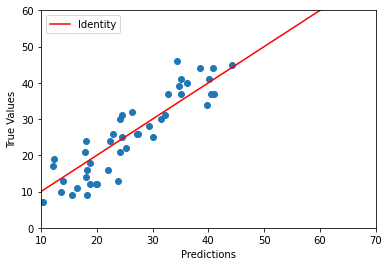

In [69]:
#Vamos a plotear Predictions vs True values
plt.scatter(linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((10,70))
plt.ylim((0,60))
plt.legend()
print(f'R2 score: {lineal_linear_r2:.6f}')
print(f'MAE: {lineal_linear_mae:.6f}')
print(f'MSE: {lineal_linear_mse:.6f}')


In [70]:
#Guardamos los resultados
results_df = results_df.append({'Model':'Linear',
                                'Features':'Linear',
                                'R2':lineal_linear_r2,
                                'MSE':lineal_linear_mse,
                                'MAE':lineal_linear_mae},ignore_index=True)

In [71]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Linear,0.804901,25.349026,4.272417


### Polynomial Features

In [72]:
lr = LinearRegression()
lr.fit(x_train_poly_scaled, y_train)
# Predecimos para el set polinomico
poly_linear_prediction = lr.predict(x_test_poly_scaled)

# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test , y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test , y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test , y_pred=poly_linear_prediction)

R2 score: 0.740643
MAE: 4.699690
MSE: 33.698016


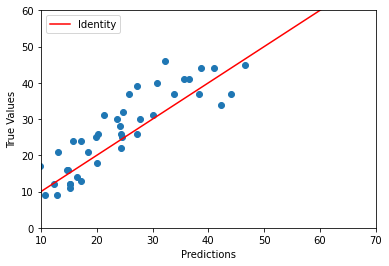

In [73]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((10,70))
plt.ylim((0,60))
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mae:.6f}')
print(f'MSE: {poly_linear_mse:.6f}')

In [74]:
results_df = results_df.append({'Model':'Linear',
                                'Features':'Poly',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Linear,0.804901,25.349026,4.272417
1,Linear,Poly,0.740643,33.698016,4.699690


### Support Vector Regression

In [75]:
# Ahora cambiamos el estimador, usaremos SVR
svr = SVR(max_iter=25000)
svr

SVR(max_iter=25000)

#### Linear Features

In [76]:
# fiteo + Prediccion + Metricas
svr.fit(x_train_scaled, y_train)
svr_linear_prediction = svr.predict(x_test_scaled)

svr_linear_r2 = r2_score(y_true=y_test, y_pred=svr_linear_prediction)
svr_linear_mse = mean_squared_error(y_true=y_test, y_pred=svr_linear_prediction)
svr_linear_mae = mean_absolute_error(y_true=y_test, y_pred=svr_linear_prediction)

R2 score: 0.618636
MAE: 5.944589
MSE: 49.550153


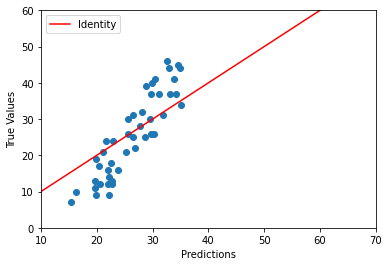

In [77]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(svr_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((10,70))
plt.ylim((0,60))
plt.legend()
print(f'R2 score: {svr_linear_r2:.6f}')
print(f'MAE: {svr_linear_mae:.6f}')
print(f'MSE: {svr_linear_mse:.6f}')

In [78]:
results_df = results_df.append({'Model':'SVR',
                                'Features':'Linear',
                                'R2':svr_linear_r2,
                                'MSE':svr_linear_mse,
                                'MAE':svr_linear_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Linear,0.804901,25.349026,4.272417
1,Linear,Poly,0.740643,33.698016,4.699690
2,SVR,Linear,0.618636,49.550153,5.944589


#### Features Polinomicas

In [79]:
# fiteo + Prediccion + Metricas
svr.fit(x_train_poly_scaled, y_train)
poly_svr_prediction = svr.predict(x_test_poly_scaled)

poly_svr_r2 = r2_score(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mse = mean_squared_error(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mae = mean_absolute_error(y_true=y_test, y_pred=poly_svr_prediction)

R2 score: 0.296326
MAE: 8.187856
MSE: 91.427628


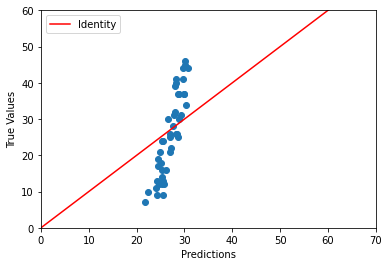

In [80]:
#Plot
plt.scatter(poly_svr_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,70))
plt.ylim((0,60))
plt.legend()
print(f'R2 score: {poly_svr_r2:.6f}')
print(f'MAE: {poly_svr_mae:.6f}')
print(f'MSE: {poly_svr_mse:.6f}')

In [81]:
#Guardamos
results_df = results_df.append({'Model':'SVR',
                                'Features':'Poly',
                                'R2':poly_svr_r2,
                                'MSE':poly_svr_mse,
                                'MAE':poly_svr_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Linear,0.804901,25.349026,4.272417
1,Linear,Poly,0.740643,33.698016,4.699690
2,SVR,Linear,0.618636,49.550153,5.944589
3,SVR,Poly,0.296326,91.427628,8.187856


### Ridge Regression


#### Linear Features

In [82]:
# Ahora cambiamos el estimador, usaremos Ridge Regression
ridge = Ridge(alpha=1.7)

In [83]:
# Entrenamos (con datos escalados)
ridge.fit(x_train_scaled, y_train)
#Predicciones + Metricas
ridge_linear_prediction = ridge.predict(x_test_scaled)
ridge_linear_r2 = r2_score(y_true=y_test, y_pred=ridge_linear_prediction)
ridge_linear_mse = mean_squared_error(y_true=y_test, y_pred=ridge_linear_prediction)
ridge_linear_mae = mean_absolute_error(y_true=y_test, y_pred=ridge_linear_prediction)

R2 score: 0.812553
MAE: 4.277940
MSE: 24.354747


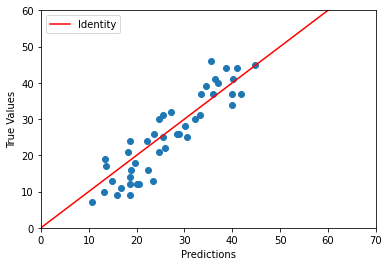

In [84]:
# Plots 
plt.scatter(ridge_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,70))
plt.ylim((0,60))
plt.legend()
print(f'R2 score: {ridge_linear_r2:.6f}')
print(f'MAE: {ridge_linear_mae:.6f}')
print(f'MSE: {ridge_linear_mse:.6f}')

In [85]:
#Guardamos resultados
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Linear',
                                'R2':ridge_linear_r2,
                                'MSE':ridge_linear_mse,
                                'MAE':ridge_linear_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Linear,0.804901,25.349026,4.272417
1,Linear,Poly,0.740643,33.698016,4.699690
2,SVR,Linear,0.618636,49.550153,5.944589
3,SVR,Poly,0.296326,91.427628,8.187856
4,Ridge,Linear,0.812553,24.354747,4.277940


#### Polynomial Features 

In [86]:
# Fiteo + Prediccion + Metricas
ridge.fit(x_train_poly_scaled, y_train)
poly_ridge_prediction = ridge.predict(x_test_poly_scaled)

poly_ridge_r2 = r2_score(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mse = mean_squared_error(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mae = mean_absolute_error(y_true=y_test, y_pred=poly_ridge_prediction)

R2 score: 0.783772
MAE: 4.367543
MSE: 28.094206


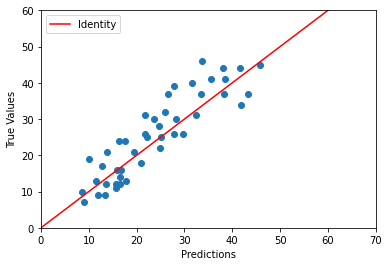

In [87]:
# Plots
plt.scatter(poly_ridge_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,70))
plt.ylim((0,60))
plt.legend()
print(f'R2 score: {poly_ridge_r2:.6f}')
print(f'MAE: {poly_ridge_mae:.6f}')
print(f'MSE: {poly_ridge_mse:.6f}')

In [88]:
# Guardamos
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Poly',
                                'R2':poly_ridge_r2,
                                'MSE':poly_ridge_mse,
                                'MAE':poly_ridge_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Linear,0.804901,25.349026,4.272417
1,Linear,Poly,0.740643,33.698016,4.699690
2,SVR,Linear,0.618636,49.550153,5.944589
3,SVR,Poly,0.296326,91.427628,8.187856
4,Ridge,Linear,0.812553,24.354747,4.277940
5,Ridge,Poly,0.783772,28.094206,4.367543


### KNN Regression

#### Linear Features

In [89]:
knr = KNeighborsRegressor()

In [90]:
# Entrenamos (con datos escalados)
knr.fit(x_train_scaled, y_train)
#Predicciones + Metricas
knr_linear_prediction = knr.predict(x_test_scaled)
knr_linear_r2 = r2_score(y_true=y_test, y_pred=knr_linear_prediction)
knr_linear_mse = mean_squared_error(y_true=y_test, y_pred=knr_linear_prediction)
knr_linear_mae = mean_absolute_error(y_true=y_test, y_pred=knr_linear_prediction)

R2 score: 0.563720
MAE: 6.031111
MSE: 56.685333


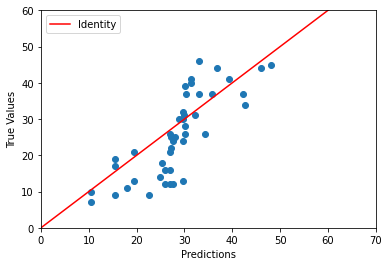

In [91]:
# Plots 
plt.scatter(knr_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,70))
plt.ylim((0,60))
plt.legend()
print(f'R2 score: {knr_linear_r2:.6f}')
print(f'MAE: {knr_linear_mae:.6f}')
print(f'MSE: {knr_linear_mse:.6f}')

In [92]:
#Guardamos resultados
results_df = results_df.append({'Model':'KNR',
                                'Features':'Linear',
                                'R2':knr_linear_r2,
                                'MSE':knr_linear_mse,
                                'MAE':knr_linear_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Linear,0.804901,25.349026,4.272417
1,Linear,Poly,0.740643,33.698016,4.699690
2,SVR,Linear,0.618636,49.550153,5.944589
3,SVR,Poly,0.296326,91.427628,8.187856
4,Ridge,Linear,0.812553,24.354747,4.277940
5,Ridge,Poly,0.783772,28.094206,4.367543
6,KNR,Linear,0.563720,56.685333,6.031111


#### Polynomial Features

In [93]:
# Fiteo + Prediccion + Metricas
knr.fit(x_train_poly_scaled, y_train)
poly_knr_prediction = knr.predict(x_test_poly_scaled)

poly_knr_r2 = r2_score(y_true=y_test, y_pred=poly_knr_prediction)
poly_knr_mse = mean_squared_error(y_true=y_test, y_pred=poly_knr_prediction)
poly_knr_mae = mean_absolute_error(y_true=y_test, y_pred=poly_knr_prediction)

R2 score: 0.544996
MAE: 6.222222
MSE: 59.118222


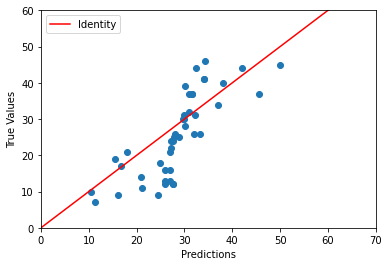

In [94]:
# Plots
plt.scatter(poly_knr_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,70))
plt.ylim((0,60))
plt.legend()
print(f'R2 score: {poly_knr_r2:.6f}')
print(f'MAE: {poly_knr_mae:.6f}')
print(f'MSE: {poly_knr_mse:.6f}')

In [95]:
# Guardamos
results_df = results_df.append({'Model':'KNR',
                                'Features':'Poly',
                                'R2':poly_knr_r2,
                                'MSE':poly_knr_mse,
                                'MAE':poly_knr_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Linear,0.804901,25.349026,4.272417
1,Linear,Poly,0.740643,33.698016,4.699690
2,SVR,Linear,0.618636,49.550153,5.944589
3,SVR,Poly,0.296326,91.427628,8.187856
4,Ridge,Linear,0.812553,24.354747,4.277940
5,Ridge,Poly,0.783772,28.094206,4.367543
6,KNR,Linear,0.563720,56.685333,6.031111
7,KNR,Poly,0.544996,59.118222,6.222222
